In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Functions

In [2]:
def vector_length(vector):
    """Calculate length of given vector"""
    return(np.sqrt(vector[0]**2 + vector[1]**2))

In [3]:
def Rotating_Matrix(theta,vector):
        """Rotate Direction vector"""
    r = np.array(( (np.cos(theta), -np.sin(theta)),
                  (np.sin(theta),  np.cos(theta)) ))
    rotated_vector = r.dot(vector)
    
    return(rotated_vector)

In [4]:
def koch_sf(point1,point2):
    """return all points of Koch snowfalke between two given points"""
    points = point1
    points = points.reshape(1,2)
    
    length = vector_length(point2- point1)
    unit_vector = (point2 -point1)/length
    
    new_point = np.array([0,0])
    for theta in [np.radians(60) ,np.radians(-120) , np.radians(60),0]:
        
        new_point = new_point + (length/3) * unit_vector
        unit_vector = (Rotating_Matrix(theta,unit_vector))
        
        points = np.append(points,[new_point],axis=0)
    
    return(points) 

In [5]:
def grow_func(points):
    """ Add New Points of Koch snowfalke after one step """
    #points = np.transpose(np.array(points))
    step = np.array([0,0])
    step = step.reshape(1,2)
    
    for j in range(np.array(points).shape[0]-1):
        new_point = points[j:j+2]
        sf = koch_sf(new_point[0],new_point[1])
        for k in range(sf.shape[0]):
            sf[k] = sf[k] + new_point[0]
        step = np.append(step,sf[min(j,1):5],axis=0)
        
    return(step[1:])

## Process

In [6]:
level = [2,4,6,8]
p = [[],[],[],[]]
for k,l in enumerate(level):
    point = np.array([[0,0],[3,0]])
    for _ in range(l):
        point = grow_func(point)
    p[k] = np.transpose(point)


## Visualize

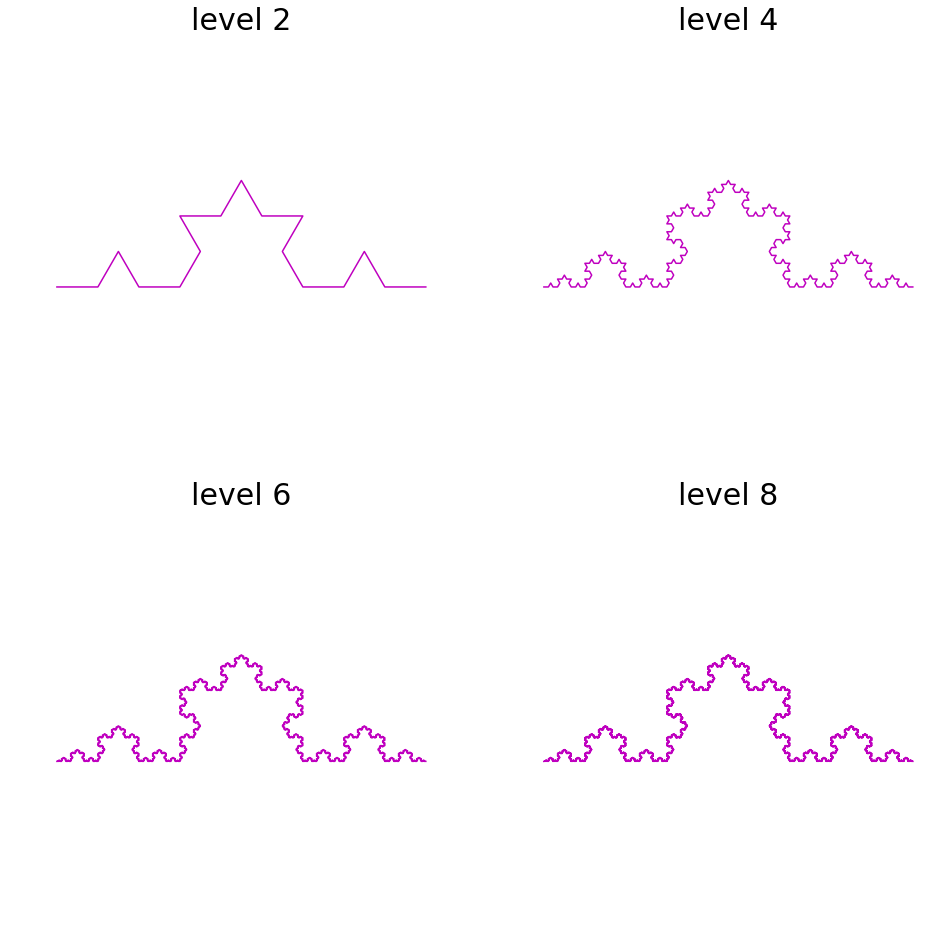

In [7]:
fig, axes = plt.subplots(2, 2,figsize = (16,16))

axes[0,0].axis('off')
axes[0,1].axis('off')
axes[1,0].axis('off')
axes[1,1].axis('off')

axes[0,0].axis('equal')
axes[0,1].axis('equal')
axes[1,0].axis('equal')
axes[1,1].axis('equal')

axes[0,0].set_title('level %i'%level[0],fontsize=30)
axes[0,1].set_title('level %i'%level[1],fontsize=30)
axes[1,0].set_title('level %i'%level[2],fontsize=30)
axes[1,1].set_title('level %i'%level[3],fontsize=30)

axes[0,0].plot(np.transpose(p[0][0]),p[0][1],'m')    
axes[0,1].plot(p[1][0],p[1][1],'m')    
axes[1,0].plot(p[2][0],p[2][1],'m')    
axes[1,1].plot(p[3][0],p[3][1],'m')    